In [44]:
%run ./../../utils/commonImports.py
%matplotlib inline

from utils.plot import plot_candles, set_date_axis

# Load data

In [29]:
# dropbox_dir = 'D:\\Dropbox\\My work\\krypl-project'
dropbox_dir = '/Users/david.vesely/Dropbox/My work/krypl-project'

db = os.path.join(dropbox_dir,'sqlite', 'ploniex-chart-data', 'USDT_BTC.db')
data = load_trading_data(db, 'chart_data', from_date='2015-01-01', period='5min')
data.shape

(381242, 10)

# Base line detection

In [28]:
data.tail()

,timestamp,period,open,high,low,close,volume,quoteVolume,weightedAverage,date
381237,1538744100,5min,"6,589.1520","6,594.8563","6,589.1520","6,594.8563",624.8332,0.0948,"6,591.3772",2018-10-05 12:55:00
381238,1538744400,5min,"6,589.9249","6,594.9835","6,589.9249","6,594.9835","7,250.7049",1.1001,"6,590.6590",2018-10-05 13:00:00
381239,1538744700,5min,"6,590.1520","6,594.9173","6,590.1520","6,594.9173",603.4239,0.0915,"6,592.2003",2018-10-05 13:05:00
381240,1538745000,5min,"6,594.0000","6,595.0000","6,594.0000","6,595.0000","1,476.3254",0.2239,"6,594.0279",2018-10-05 13:10:00
381241,1538745300,5min,"6,595.1000","6,595.9343","6,595.1000","6,595.9343",386.2321,0.0586,"6,595.3626",2018-10-05 13:15:00


In [65]:
data['ohlc4'] = (data['open'] + data['close'] + data['high'] + data['low']) / 4
data['stdOhlc4'] = data['ohlc4'].rolling(60).std() / data['ohlc4'].rolling(10).max()

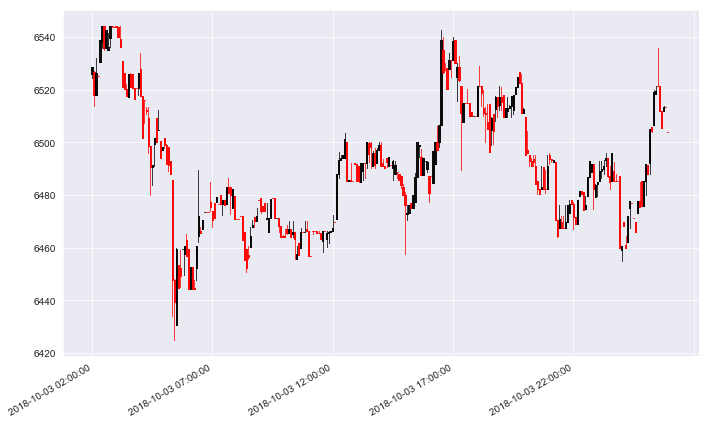

In [68]:
selected_data = data.query('date >= "2018-10-03" and date < "2018-10-04"')
plot_candles(selected_data);

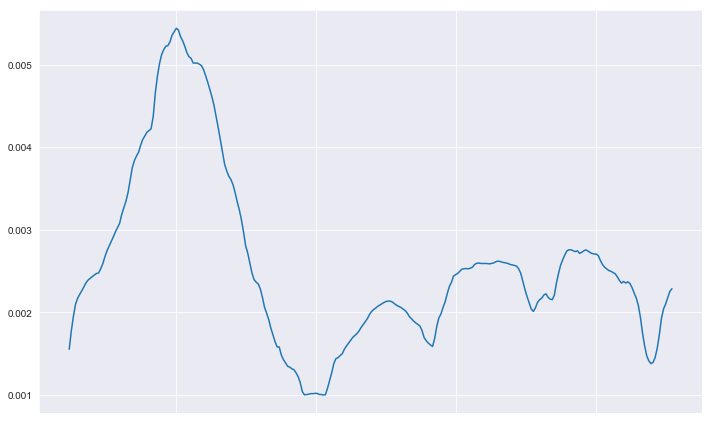

In [69]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(selected_data['timestamp'], selected_data['stdOhlc4'])
set_date_axis(selected_data['timestamp'], ax, fig)